The region and the domain category that your data sets are about (e.g., Ann Arbor, Michigan, United States and weather phenomena). the dataset is given in 'weather.csv'. the data consist of natural disaster happened due to seasonal changes.
 
The following variables are provided to you:
 
* **year** : years list of disaster happened.
* **Fires** : number of wild fires occurred in each year.
* **Acres** : number of burned acres in US.
 
Here are the assignment instructions:
 
1. Familiarise the dataset about disaster then write some python code for following tasks.
2. Identify the correlation between fires and acres.
3. Compute moving averages for 5years of fires and acres.
4. Develop the relation plot for Number of Fires and Acres Burned in US in years 1987 to 2019.

In [ ]:
df = pd.read_csv('weather.csv')
df.head(5)

,Year,Fires,Acres
0,2019,50 477,4 664 364
1,2018,58 083,8 767 492
2,2017,71 499,10 026 086
3,2016,67 743,5 509 995
4,2015,68 151,10 125 149


## Importing dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Cleaning data 

In [ ]:
df.dtypes

Year      int64
Fires    object
Acres    object
dtype: object

In [ ]:
#Removing '\xa0' in data to make columns 'Fires' & 'Acres' as integer types.
for column in df[['Fires','Acres']]:
    for i in range(df.shape[0]):
        df[column][i] = df[column][i].replace('\xa0','')
    #print(df[column][0])


<ipython-input-60-73114e0c877b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = df[column][i].replace('\xa0','')


In [ ]:
df.head(5)

,Year,Fires,Acres
0,2019,50477,4664364
1,2018,58083,8767492
2,2017,71499,10026086
3,2016,67743,5509995
4,2015,68151,10125149


In [ ]:
df =  df.astype(int) 
df.dtypes

Year     int32
Fires    int32
Acres    int32
dtype: object

## Identify the correlation between fires and acres.

In [ ]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Fires,Acres
Year,1.000000,-0.692403,-0.710595
Fires,-0.692403,1.000000,0.529634
Acres,-0.710595,0.529634,1.000000


In [ ]:
print('Correlation between Fires & Acres=', df['Fires'].corr(df['Acres']))

Correlation between Fires & Acres= 0.5296336923555135


## Compute moving averages for 5years of fires and acres.

In [ ]:
#Calculating 'Simple Moving Average(SMA)' for 'Fires' & 'Acres' column
df['Fires_SMA_5'] = df.iloc[:,1].rolling(window=5).mean()
df['Acres_SMA_5'] = df.iloc[:,2].rolling(window=5).mean()

In [ ]:
df.head(5)

,Year,Fires,Acres,Fires_SMA_5,Acres_SMA_5
0,2019,50477,4664364,NaN,NaN
1,2018,58083,8767492,NaN,NaN
2,2017,71499,10026086,NaN,NaN
3,2016,67743,5509995,NaN,NaN
4,2015,68151,10125149,63190.6,7818617.2


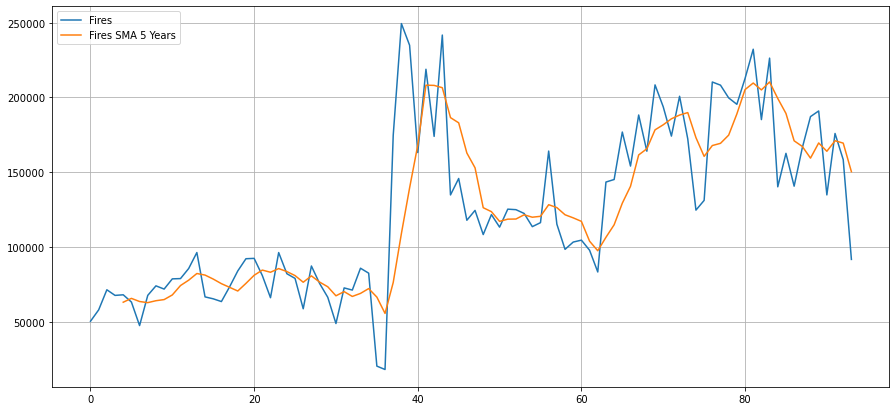

In [ ]:
plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(df['Fires'],label='Fires')
plt.plot(df['Fires_SMA_5'],label='Fires SMA 5 Years')
plt.legend(loc=2)

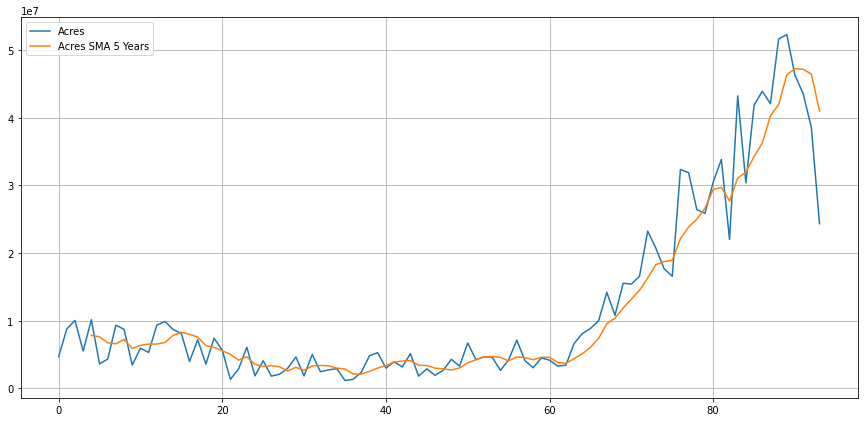

In [ ]:
plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(df['Acres'],label='Acres')
plt.plot(df['Acres_SMA_5'],label='Acres SMA 5 Years')
plt.legend(loc=2)

## Develop the relation plot for Number of Fires and Acres Burned in US in years 1987 to 2019.

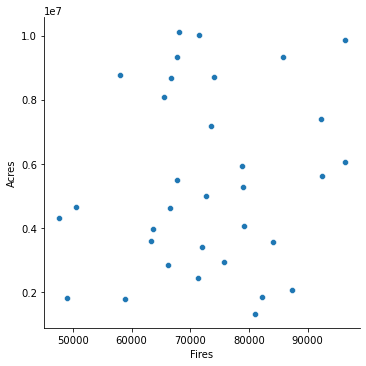

In [ ]:
#df[df['Year']>1986]
sns.relplot(x="Fires", y="Acres", data=df[df['Year']>1986]);